# Project: Investigate Movies data to study elements affecting the profit

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this Project i will analyze a dataset conatining many informtion about movies through many years. I'll try through this analysis to conclude the most important elements that affect the popularity and incresing profit.
>


In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties


In [27]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.shape
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
#Detect zero values with not null values
df[df.budget_adj==0].count()    #5696 rows without budget
df[df.revenue_adj==0].count()   #6016 rows without revenue
df[df.runtime==0].count()       #31 rows without runtime

id                      31
imdb_id                 31
popularity              31
budget                  31
revenue                 31
original_title          31
cast                    31
homepage                 6
director                29
tagline                  5
keywords                15
overview                29
runtime                 31
genres                  30
production_companies    13
release_date            31
vote_count              31
vote_average            31
release_year            31
budget_adj              31
revenue_adj             31
dtype: int64

### Data Cleaning (Drop the columns which are not needed in the analysis and duplicates and replce zeros)

In [29]:
sum(df.duplicated())
#Drop 1 Duplicated row
df.drop_duplicates(inplace=True)

In [32]:
# Drop columns no required for analysis
df.drop(['imdb_id','budget','revenue','homepage','tagline','keywords','overview','release_date'],axis=1,inplace=True)
#Replace Zeros with NAN
df[['budget_adj','revenue_adj']]=df[['budget_adj','revenue_adj']].replace(0,np.NaN)
#Replace zero run time with mean
df.replace({'runtime':0},df.runtime.mean())


,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95.0,Documentary,Bruce Brown Films,11,7.4,1966,NaN,NaN
10862,20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,NaN,NaN
10863,39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94.0,Mystery|Comedy,Mosfilm,11,6.5,1966,NaN,NaN
10864,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80.0,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,NaN,NaN


In [38]:
#Convert budject and revenue to million 
df.budget_adj=df.budget_adj/1000000
df.revenue_adj=df.revenue_adj/1000000
#calculate net profit
df['profit']=df['revenue_adj']-df['budget_adj']

In [39]:
#Create a function to distribute culomns containing lements separted by ny sign into rows:
def expRow (dframe,col,sign):
    newDf=dframe.copy()
    newDf[col]=newDf[col].str.split(sign)
    newDf=newDf.explode(col)
    return newDf

In [40]:
#In this part i'll use the previous function to get detiled rows containing data for production compnies, cast nd genres
dfProd=expRow(df,'production_companies','|')
dfCast=expRow(df,'cast','|')
dfGenr=expRow(df,'genres','|')


<a id='eda'></a>
## Exploratory Data Analysis

> In this part i'll try to detect the most important fctors in achieving profits thruogh finding the top twinty items in certin rows that had most profits

### Research Question 1 (Most genres,films,actor,director,production company and production year which achieved profit)

cast
Harrison Ford        11808.415335
Tom Cruise            8361.768625
Tom Hanks             8079.464502
Carrie Fisher         7263.715471
Emma Watson           7212.039540
Daniel Radcliffe      7071.883857
Mark Hamill           7028.274589
Rupert Grint          6974.591012
Ian McKellen          6576.083507
Sean Connery          6181.236271
Orlando Bloom         5943.291918
Eddie Murphy          5891.334534
Cameron Diaz          5853.821146
Ralph Fiennes         5675.741759
Sandra Bullock        5516.587733
Leonardo DiCaprio     5506.423879
Will Smith            5480.301579
Johnny Depp           5279.780160
Bruce Willis          5259.090382
Samuel L. Jackson     5251.745497
Name: profit, dtype: float64

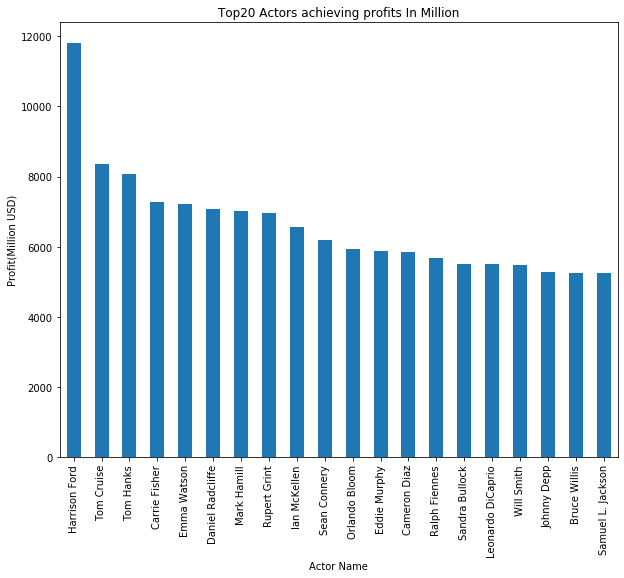

In [41]:
# In This Cell we will display top 20 actors achived profits.
dfCast.groupby('cast').profit.sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,8),title='Top20 Actors achieving profits In Million')
plt.xlabel('Actor Name')
plt.ylabel('Profit(Million USD)');
dfCast.groupby('cast').profit.sum().sort_values(ascending=False).head(20)

<a id='eda'></a>
## Conclusion 1:

> From the bove figure we note that movies starred by Hrison Ford achieved most profits with more than 12 billion daollras and far after him comes Tom Cruise in the second place with about 8 Bilion dollars.


original_title
Star Wars                                        2750.136651
Avatar                                           2586.236848
Titanic                                          2234.713671
The Exorcist                                     2128.035625
Jaws                                             1878.643094
E.T. the Extra-Terrestrial                       1767.968064
Star Wars: The Force Awakens                     1718.723211
The Net                                          1551.568265
One Hundred and One Dalmatians                   1545.635295
The Empire Strikes Back                          1376.997526
The Jungle Book                                  1319.404004
Jurassic Park                                    1293.766704
Jurassic World                                   1254.445953
The Godfather                                    1246.626367
The Avengers                                     1218.894738
The Lord of the Rings: The Return of the King    1214.854862
Furious 7

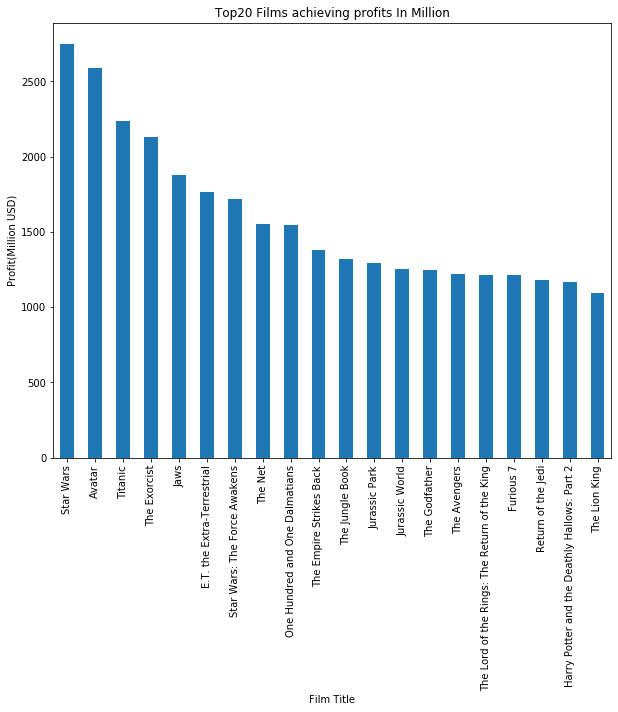

In [42]:
# In This Cell we will display top 20 Films achived profits.
df.groupby('original_title').profit.sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,8),title='Top20 Films achieving profits In Million')
plt.xlabel('Film Title')
plt.ylabel('Profit(Million USD)');
df.groupby('original_title').profit.sum().sort_values(ascending=False).head(20)


<a id='eda'></a>
## Conclusion 2:

> From the bove figure we note that Top movie in profit was Star Wars with about 2.75 Billion Dollars nd 2nd was Avatar with bout 2.6 Billions.


director
Steven Spielberg     13126.025234
James Cameron         6296.578360
George Lucas          5844.159208
Peter Jackson         5645.491690
Robert Zemeckis       4335.995165
Chris Columbus        4171.046474
Michael Bay           3958.675887
David Yates           3394.430108
Tim Burton            3200.595270
Christopher Nolan     3149.568381
Roland Emmerich       2971.857703
Ron Howard            2720.393087
J.J. Abrams           2689.650392
Gore Verbinski        2656.452745
Sam Raimi             2614.454958
Guy Hamilton          2607.511641
Clint Eastwood        2494.672455
Ridley Scott          2404.928185
Francis Lawrence      2377.728887
Richard Donner        2272.671890
Name: profit, dtype: float64

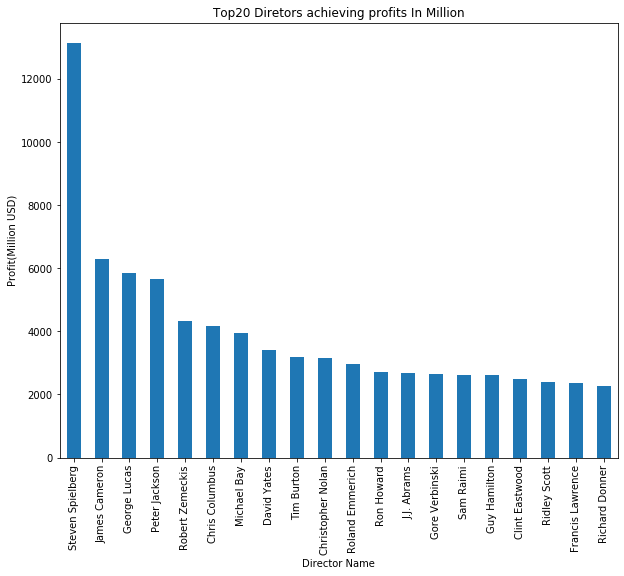

In [43]:
# In This Cell we will display top 20 Directors achived profits.
df.groupby('director').profit.sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,8),title='Top20 Diretors achieving profits In Million')
plt.xlabel('Director Name')
plt.ylabel('Profit(Million USD)');
df.groupby('director').profit.sum().sort_values(ascending=False).head(20)


<a id='eda'></a>
## Conclusion 3:

> From the bove figure we note that movies directed by Steven Spilberg achieved most profits with more than 13 billion daollras and far after him comes James Cameron in the second place with about 6 Bilion dollars.


genres
Adventure          142423.655191
Action             139905.667129
Drama              117065.501069
Comedy             111535.343106
Thriller           100617.230555
Family              73393.265493
Science Fiction     70862.141698
Fantasy             67223.073214
Romance             53103.565230
Crime               45885.778798
Animation           41704.531098
Horror              26930.785304
Mystery             24512.882161
Music               13514.048091
War                 11736.394559
History              8356.862055
Western              3561.152504
Documentary           679.926247
TV Movie               51.438019
Foreign                -2.138031
Name: profit, dtype: float64

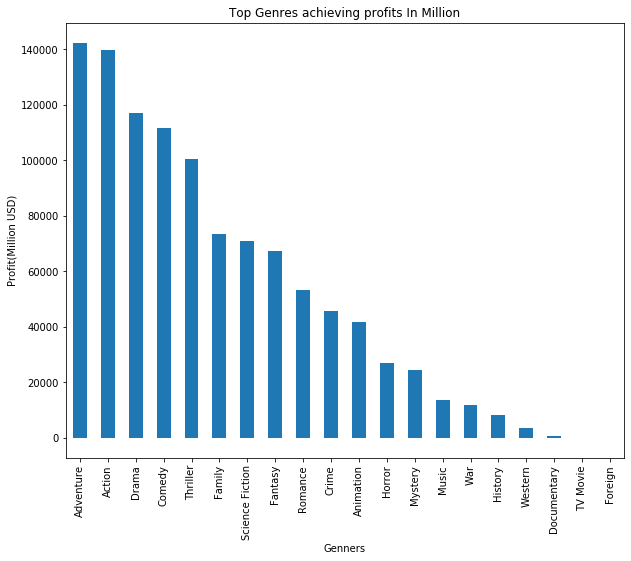

In [44]:
# In This Cell we will display top genres achived profits.
dfGenr.groupby('genres').profit.sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,8),title='Top Genres achieving profits In Million')
plt.xlabel('Genners')
plt.ylabel('Profit(Million USD)');
dfGenr.groupby('genres').profit.sum().sort_values(ascending=False)

<a id='eda'></a>
## Conclusion 4:

> From the bove figure we note that the most genner achievieng profit was adventure and action with about 140 Billion USD .


production_companies
Warner Bros.                              43922.987911
Universal Pictures                        42619.184873
Paramount Pictures                        38105.201609
Twentieth Century Fox Film Corporation    37751.899668
Walt Disney Pictures                      25554.287274
Columbia Pictures                         20317.010537
Amblin Entertainment                      16390.766872
New Line Cinema                           15912.625178
Metro-Goldwyn-Mayer (MGM)                 13445.591756
Lucasfilm                                 13082.251529
DreamWorks SKG                            11511.102799
Columbia Pictures Corporation             11012.645828
Eon Productions                           10477.733313
Touchstone Pictures                        9737.607538
DreamWorks Animation                       8748.927254
Heyday Films                               8423.466314
Village Roadshow Pictures                  8318.185560
Relativity Media                           8

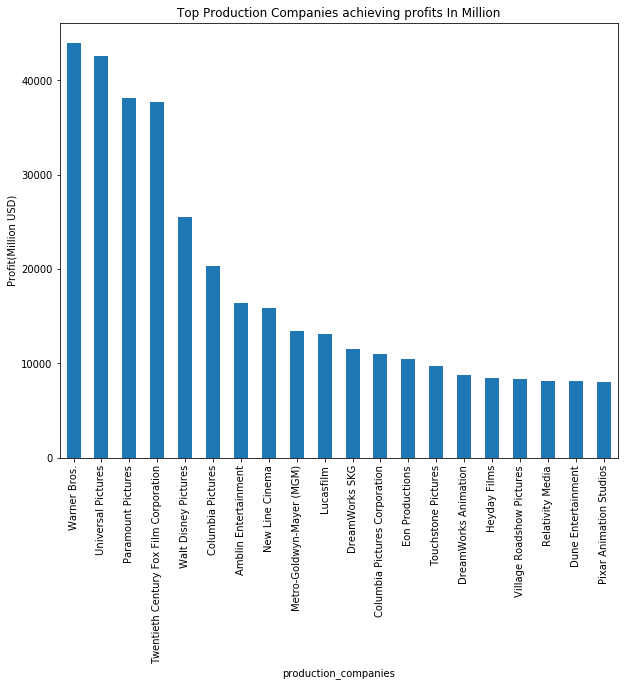

In [45]:
# In This Cell we will display top Production companies achived profits.
dfProd.groupby('production_companies').profit.sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,8),title='Top Production Companies achieving profits In Million')
plt.xlabel('production_companies')
plt.ylabel('Profit(Million USD)');
dfProd.groupby('production_companies').profit.sum().sort_values(ascending=False).head(20)

<a id='eda'></a>
## Conclusion 5:

> From the bove figure we note that the most production company achievieng profit was Warner Bros with about 46.7 Billion USD and next to them was Universal Pictures with about 45.2 Billion USD.


release_year
2015    17509.565947
2012    15762.759109
2014    15360.299831
2013    14773.174150
2011    14508.684550
2009    14300.047782
2010    13341.222037
2007    12289.908080
2008    11994.810035
2004    11339.547607
2002    10915.916027
2003    10907.799019
2005    10338.765300
2001     9879.052935
2006     9438.969575
1997     8667.304574
1999     8421.410724
1995     8025.002883
2000     7738.025971
1998     7055.200398
Name: profit, dtype: float64

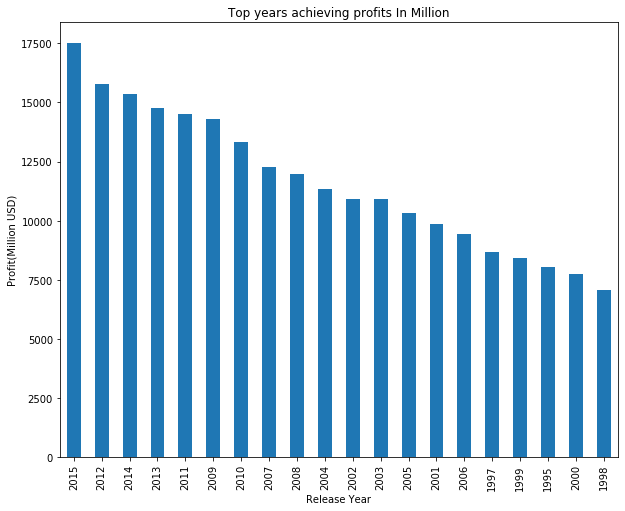

In [46]:
# In This Cell we will display the profit for the top 20 years.
df.groupby('release_year').profit.sum().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(10,8),title='Top years achieving profits In Million')
plt.xlabel('Release Year')
plt.ylabel('Profit(Million USD)');
df.groupby('release_year').profit.sum().sort_values(ascending=False).head(20)

<a id='eda'></a>
## Conclusion 6:

> From the bove figure we note that the top release year was 2015 which achieved 17.6 Billion USD and next to it was 2012 with about 15.5 Billion USD. This point can be studied with further investigations to look for the relation between GDP for example and the profit from movies. 


<a id='eda'></a>
## From The previous results we note that:

>-Top actor achieving profits is Harison Ford.

>-Top Film achieved profits is Star Wars and Avatar.

>-Top Director was Steven Spilberg.

>-Top Genres in profit was Adventure and Action.

>-Top Production company was Wrner Bros..

>-The best profit was achieved in 2015.

### Research Question 2  (In This part we will study trends to show elements effecting profit)

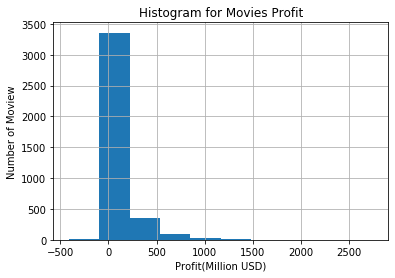

In [47]:
#View distribution of profit to study the values that effect the results
df.profit.hist()
plt.xlabel('Profit(Million USD)')
plt.ylabel('Number of Moview')
plt.title('Histogram for Movies Profit');


<a id='eda'></a>
>### We note that the main concentration for profit lies between 1 and 1200 Million USD

In [50]:
# Copy the important values to a profit Data frame for deeper study
dfprofit=df.query('profit >=1 and profit<1200');
dfprofit.describe()


,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,38276.487650,1.405851,110.399701,676.717814,6.293862,2000.522829,48.491624,178.655231,130.163607
std,67419.933004,1.515180,19.978809,953.080150,0.759002,12.010737,47.282453,201.790420,174.251077
min,12.000000,0.001117,26.000000,10.000000,3.400000,1960.000000,0.000090,1.291462,1.021500
25%,2881.500000,0.584905,96.000000,127.000000,5.800000,1994.000000,15.246007,49.034438,22.831619
50%,10539.000000,1.003872,107.000000,328.000000,6.300000,2004.000000,32.720331,104.829952,63.808165
75%,36989.750000,1.672573,121.000000,790.250000,6.800000,2010.000000,66.530169,224.958430,156.733463
max,417859.000000,28.419936,248.000000,9767.000000,8.400000,2015.000000,368.371256,1292.632337,1182.994738


In [51]:
#I will use this function to deaw and format scatter plots between defferent vriables
def myScatter (dFrm,xVar,yVar,xUnt,yUnt):
    dFrm.plot(kind='scatter',x=xVar,y=yVar,figsize=(14,6),s=2)
    xVar=xVar.replace('_',' ').title()
    yVar=yVar.replace('_',' ').title()
    plt.xlabel(xVar +  xUnt, fontsize=10,weight='bold')
    plt.ylabel(yVar + yUnt, fontsize=10,weight='bold')
    plt.title('Relation Between {} and {}'.format(xVar,yVar), fontsize=14,weight='bold');

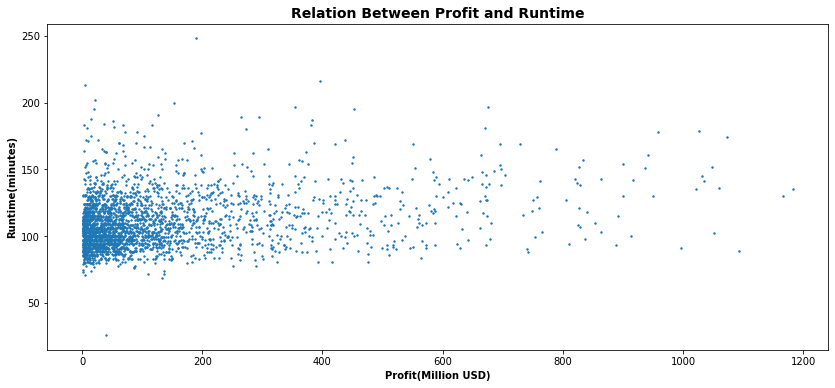

In [52]:
#Study relation between profit and runtime
myScatter(dfprofit,'profit','runtime','(Million USD)','(minutes)')


<a id='eda'></a>
>### We note that most of movies runtime is between 100 and 200 mintues and it doesn't affect the profit.

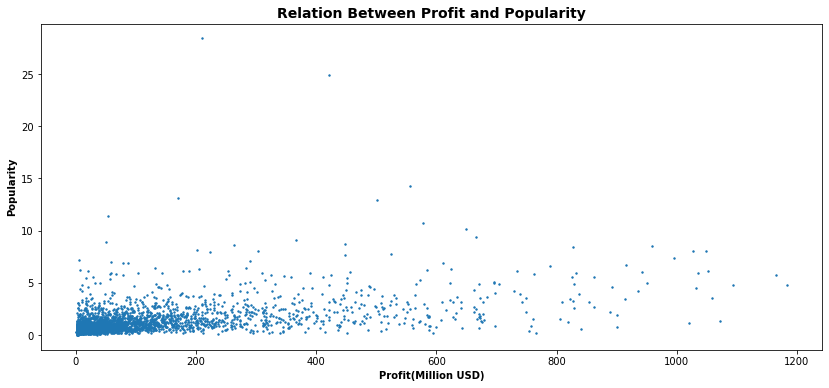

In [53]:
#Study relation between profit and popularity
myScatter(dfprofit,'profit','popularity','(Million USD)','')


<a id='eda'></a>
>### We note week positive correlation between popularity and profit.

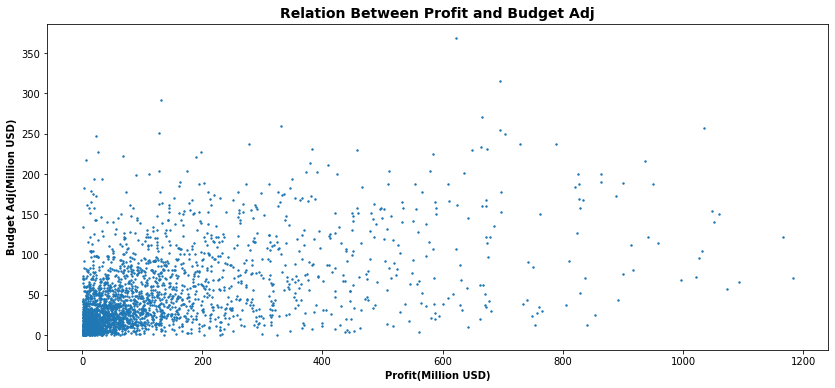

In [54]:
#Study relation between profit and budget
myScatter(dfprofit,'profit','budget_adj','(Million USD)','(Million USD)')

<a id='eda'></a>
>### We note positive correlation between budget and profit as many of high profit movies were high budget.

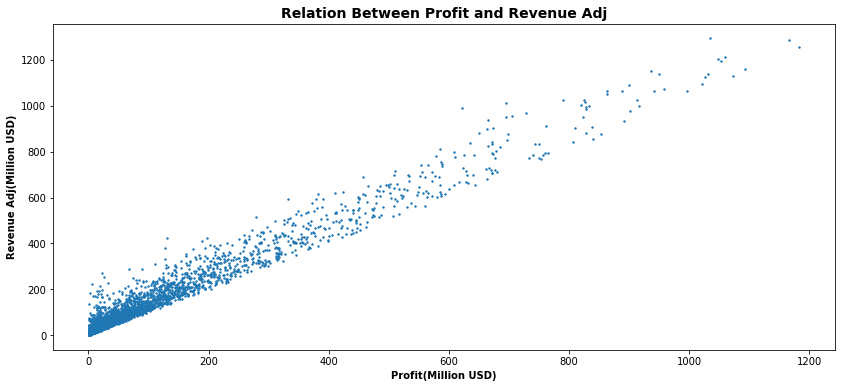

In [55]:
#Study relation between profit and revenue
myScatter(dfprofit,'profit','revenue_adj','(Million USD)','(Million USD)')

<a id='eda'></a>
>### We note strong positive correlation between Revenue and profit as there is almost linear relation between revenue and profit and this is logical because profit depends mostly on the increase of revenue if the budget was small number compared to revenue.

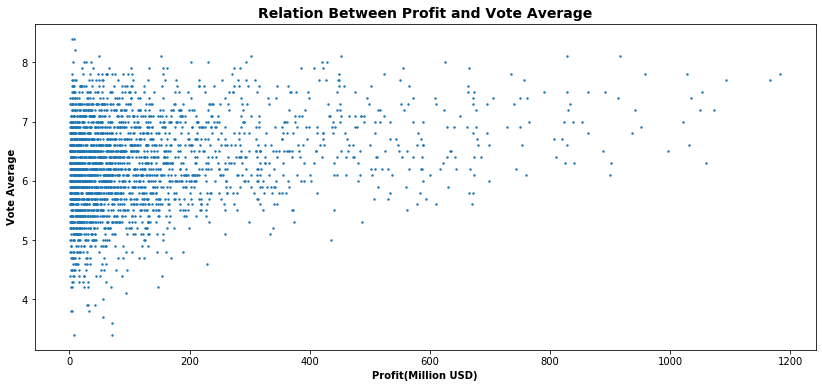

In [56]:
#Study relation between profit and vote_average
myScatter(dfprofit,'profit','vote_average','(Million USD)','')


<a id='eda'></a>
>### We note that there is week positive correlation between Vote Average and the profit as we see high average for high profit but there is also high average for some low profit.

<a id='conclusions'></a>
## Conclusions

>### From the above visuals we note that:

>1- No correlation between profit and runtime.

>2- Week positive correlation between popularity and profit.

>3- Positive correlation between budget and profit.

>4- Strong positive correlation between revenue and profit.

>5- No correlation between vote average and profit.

<a id='limitations'></a>
## Limitations of the study

>### Among the limitations of this study is that only about 40% of the dataset have budget and revenue data, and this affected the accuracy of the results as 60% of the samples don't have profit related data.